In [1]:
import csv
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [3]:
NUM_CLASSES = 7

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1147 (4.48 KB)
Trainable params: 1147 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 2s - loss: 2.1672 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 1s 98ms/step - loss: 2.1349 - accuracy: 0.1170 - val_loss: 1.9707 - val_accuracy: 0.1136
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.0946 - accuracy: 0.1328
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 26ms/step - loss: 2.0872 - accuracy: 0.1196 - val_loss: 1.9514 - val_accuracy: 0.1136
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.0840 - accuracy: 0.1562
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 27ms/step - loss: 2.0581 - accuracy: 0.1450 - val_loss: 1.9343 - val_accuracy: 0.1591


C:\Users\ivadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.0830 - accuracy: 0.1406
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 25ms/step - loss: 2.0344 - accuracy: 0.1450 - val_loss: 1.9195 - val_accuracy: 0.2348
Epoch 5/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.9615 - accuracy: 0.1484
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 26ms/step - loss: 1.9992 - accuracy: 0.1578 - val_loss: 1.9077 - val_accuracy: 0.2348
Epoch 6/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.0334 - accuracy: 0.1094
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 26ms/step - loss: 1.9920 - accuracy: 0.1247 - val_loss: 1.8997 - val_accuracy: 0.1742
Epoch 7/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.9388 - accuracy: 0.1250
Epoch 7: sav

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 9ms/step - loss: 0.3618 - accuracy: 0.9848


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 87ms/step
[0.00102964 0.00069073 0.00616741 0.50826055 0.05770543 0.09979686
 0.3263494 ]
3


5/5 [==============================] - 0s 1ms/step


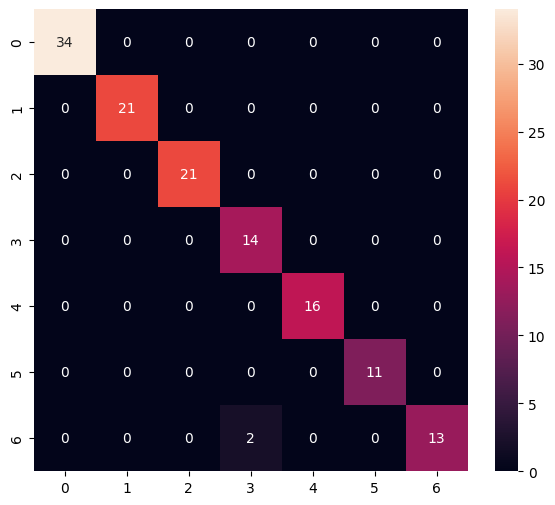

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       0.88      1.00      0.93        14
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        11
           6       1.00      0.87      0.93        15

    accuracy                           0.98       132
   macro avg       0.98      0.98      0.98       132
weighted avg       0.99      0.98      0.98       132



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:

# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\ivadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ivadu\AppData\Local\Temp\tmp_26s78kg\assets


INFO:tensorflow:Assets written to: C:\Users\ivadu\AppData\Local\Temp\tmp_26s78kg\assets


6676